# Univariate Analysis - Behavior of Factory labor demand across time

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import pearsonr
# lag plots
from matplotlib import pyplot
from pandas.plotting import lag_plot
import matplotlib.cm as cm


%matplotlib inline
TS_data = pd.read_pickle('input_df2.pkl')
TS_data = TS_data.rename(columns = {'Labor Demand': 'y'})
#TS_data = TS_data['y']
#TS_data
#input_df2.head()
#display(button)

### Labor demand has been increasing steadily over time except for strong upward movements in FY16 and FY19

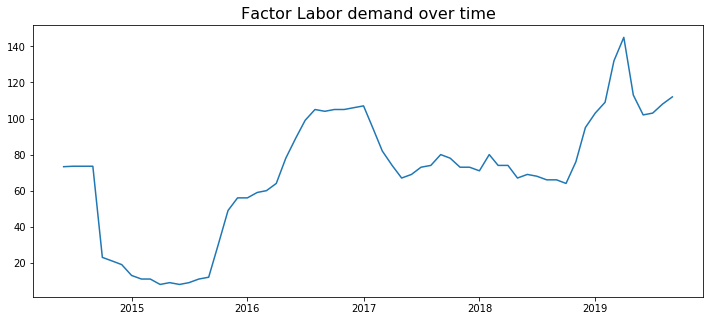

In [3]:
fig,ax1 = plt.subplots(figsize=(12,5))
plt.plot(TS_data.index,TS_data.y);
plt.title('Factor Labor demand over time',fontsize = 16);

### The modal demand of labor in  the factory has been between 60 to 80 across years

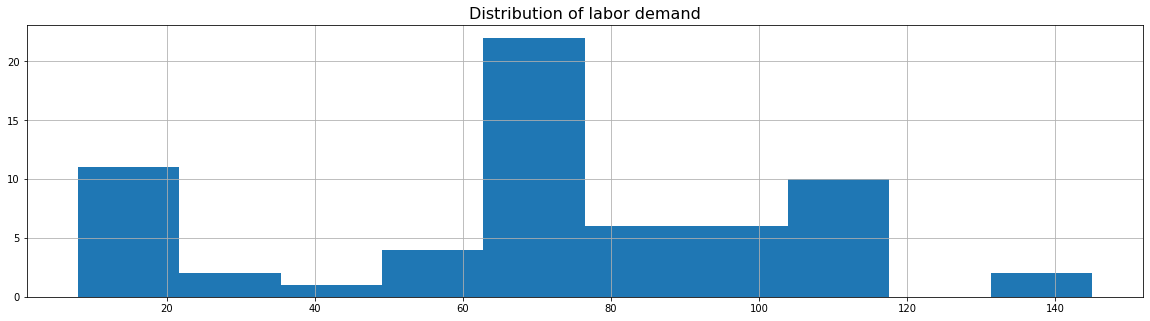

In [4]:
# Histogram
TS_data.y.hist(figsize=(20,5));
plt.title('Distribution of labor demand',fontsize = 16);

### 2014 and 2016 had a strong fluctuation in labor demand with other years having a stable demand

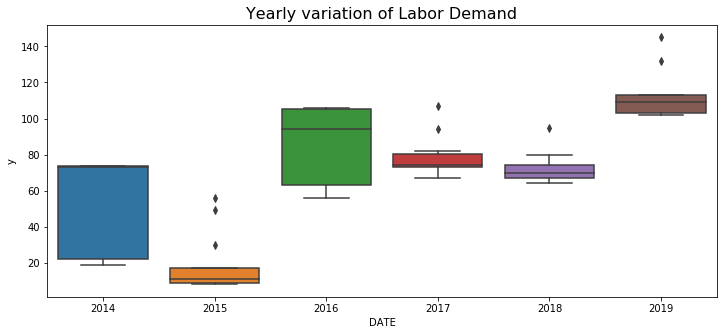

In [5]:
ts = TS_data.y
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(ts.index.year, ts, ax=ax);
plt.title('Yearly variation of Labor Demand',fontsize = 16);

### Quarter 1 and quarter 4 seem to have strong variation in Factory labor demand 

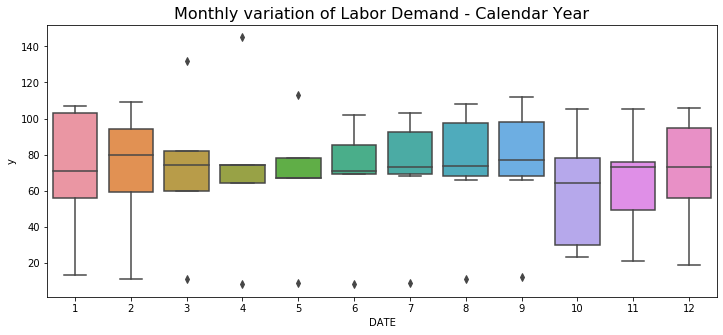

In [6]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(ts.index.month, ts, ax=ax);
# generally the first quarter you try to reduce your overhead - 
plt.title('Monthly variation of Labor Demand - Calendar Year',fontsize = 16);

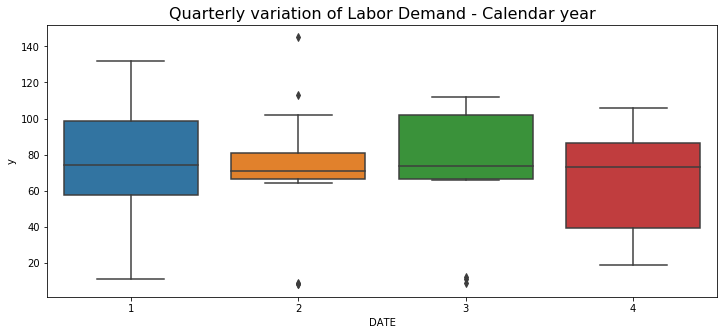

In [7]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(ts.index.quarter, ts, ax=ax);
plt.title('Quarterly variation of Labor Demand - Calendar year',fontsize = 16);

### Previous month's  Factory Labor demand strongly predicts the demand for next  month with a correlation of 95%

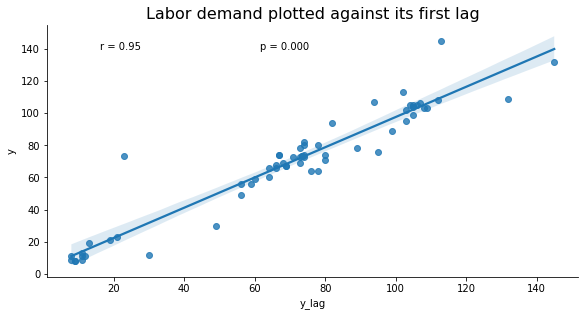

In [8]:
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

lag_df = TS_data.shift(-1)
lag1_data = pd.DataFrame()
lag1_data['y'] = TS_data['y']
lag1_data['y_lag'] = lag_df['y']
lag1_data['year'] = lag1_data.index.year
lag1_data.head()

    # pair plot
#g = sns.pairplot(lag1_data, y_vars='y_lag', x_vars='y', kind="reg", height=5, aspect=2, hue = 'year').map(corrfunc)
g = sns.pairplot(lag1_data, y_vars='y', x_vars='y_lag', height=4, aspect=2, kind = 'reg' );
g.map(corrfunc);
plt.title('Labor demand plotted against its first lag',fontsize = 16);


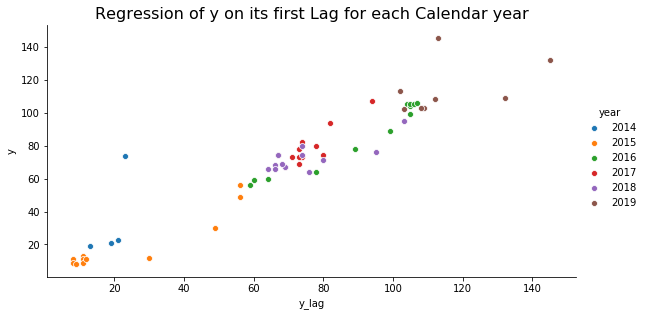

In [9]:
g = sns.pairplot(lag1_data, y_vars='y', x_vars='y_lag', height=4, aspect=2,   hue = 'year' );
plt.title('Regression of y on its first Lag for each Calendar year',fontsize = 16);

### Factory Labor demand corelates with the past demand for upto four lags

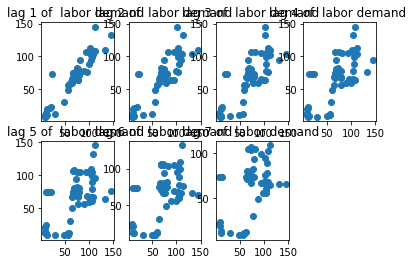

In [10]:
import pandas as pd
from pandas import concat
from pandas.plotting import scatter_matrix
series = TS_data.y
values = series
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
pyplot.rcParams["figure.figsize"] = (15, 20)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title( 'lag ' + str(i) + ' of  labor demand ')
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()
# 2016 can stand out - add colors for years - to identify trend deviation.


In [11]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')